In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("staff_schedule.csv")

df.head()


,week,staff_id,staff_name,role,service,present
0,1,STF-b77cdc60,Allison Hill,doctor,emergency,1
1,2,STF-b77cdc60,Allison Hill,doctor,emergency,1
2,3,STF-b77cdc60,Allison Hill,doctor,emergency,0
3,4,STF-b77cdc60,Allison Hill,doctor,emergency,1
4,5,STF-b77cdc60,Allison Hill,doctor,emergency,1


In [ ]:
df.tail()

,week,staff_id,staff_name,role,service,present
6547,48,STF-302eb752,Erin Edwards,nursing_assistant,ICU,0
6548,49,STF-302eb752,Erin Edwards,nursing_assistant,ICU,1
6549,50,STF-302eb752,Erin Edwards,nursing_assistant,ICU,1
6550,51,STF-302eb752,Erin Edwards,nursing_assistant,ICU,0
6551,52,STF-302eb752,Erin Edwards,nursing_assistant,ICU,1


In [ ]:
df.shape

(6552, 6)

In [ ]:
df.columns

Index(['week', 'staff_id', 'staff_name', 'role', 'service', 'present'], dtype='object')

In [ ]:
df.dtypes

,0
week,int64
staff_id,object
staff_name,object
role,object
service,object
present,int64


In [ ]:
df.isnull().sum()

,0
week,0
staff_id,0
staff_name,0
role,0
service,0
present,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df['staff_id'] = df['staff_id'].str.strip().str.title()


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
week,6552.0,26.500000,15.009476,1.0,13.75,26.5,39.25,52.0
present,6552.0,0.599817,0.489973,0.0,0.00,1.0,1.00,1.0


In [ ]:
df['staff_id'].value_counts()

,count
staff_id,
Stf-B77Cdc60,52
Stf-5E560B99,52
Stf-2E0Dd6E9,52
Stf-403052C0,52
Stf-C696Ae9C,52
...,...
Stf-E983Db1D,52
Stf-6A7114Cb,52
Stf-9Da1Bed5,52


In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

numeric_cols = ['week', 'present']
cat_cols = ['staff_id', 'staff_name', 'role', 'service']

scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

for col in cat_cols:
    df[col] = LabelEncoder().fit_transform(df[col])
print(df.head())

       week  staff_id  staff_name  role  service   present
0 -1.699056        94           3     0        1  0.816808
1 -1.632427        94           3     0        1  0.816808
2 -1.565797        94           3     0        1 -1.224278
3 -1.499167        94           3     0        1  0.816808
4 -1.432538        94           3     0        1  0.816808


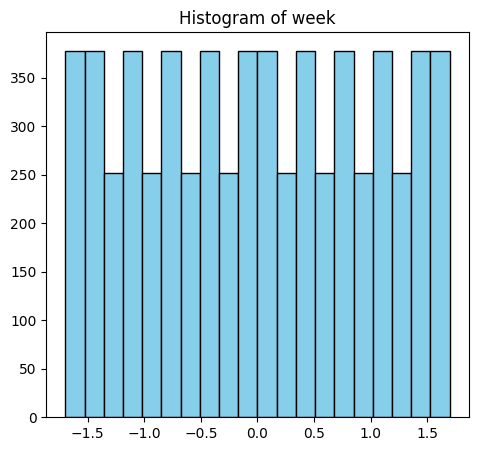

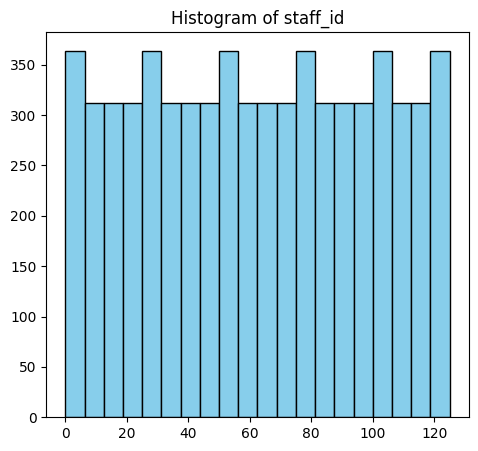

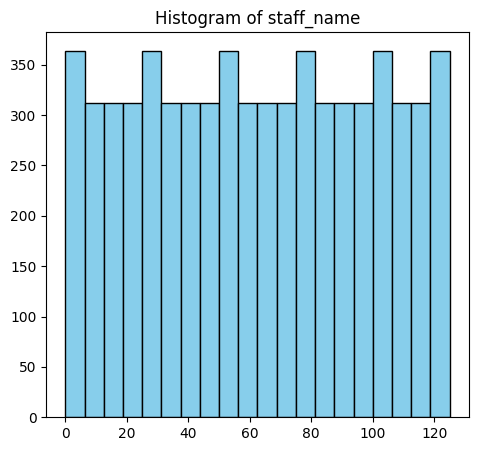

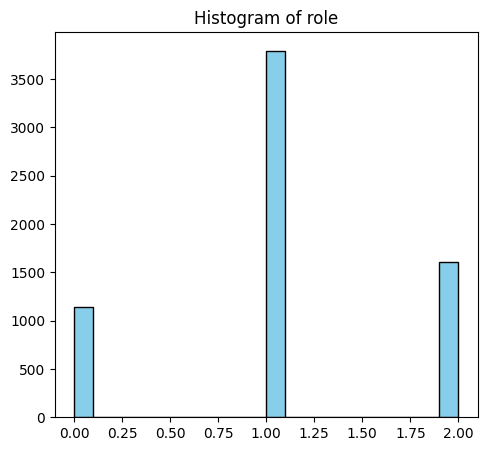

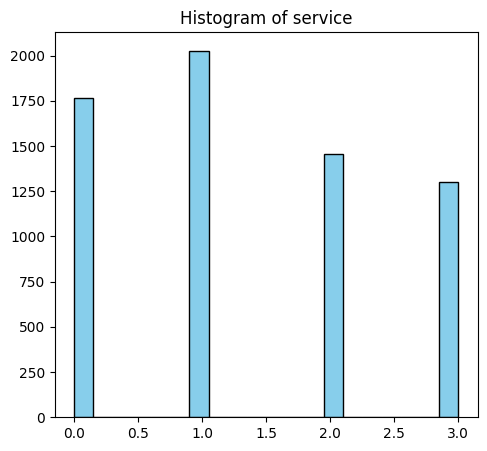

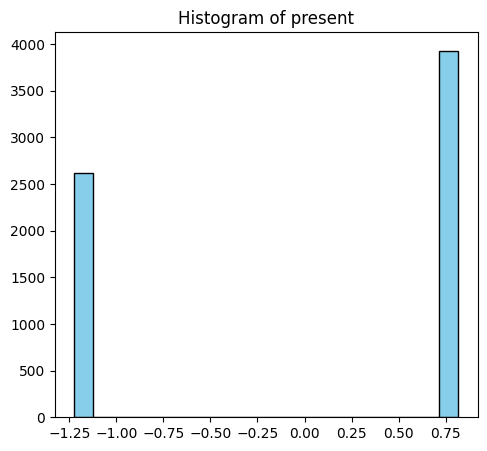

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = df.select_dtypes(include='number').columns

for col in num_cols:
    plt.figure(figsize=(12,5))

    # Histogram
    plt.subplot(1,2,1)
    plt.hist(df[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(f"Histogram of {col}")


    plt.show()


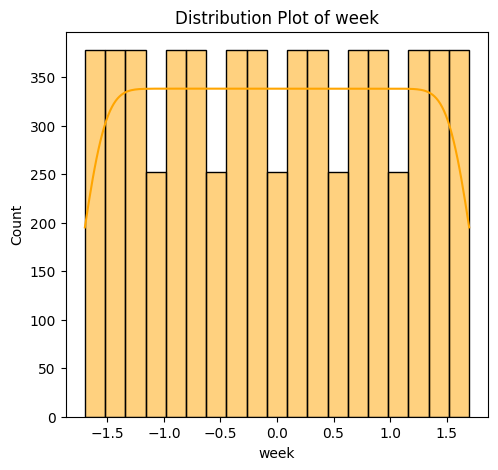

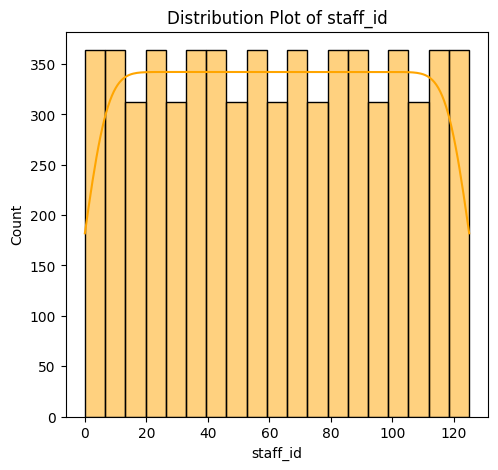

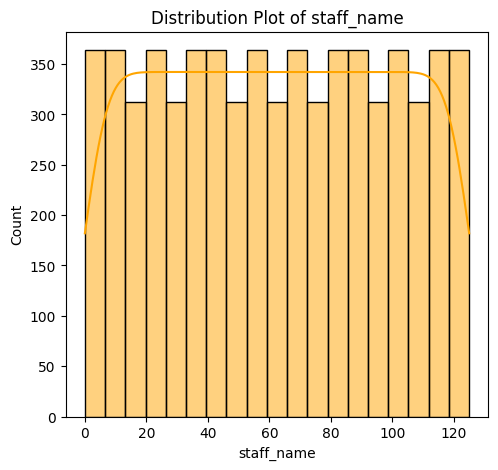

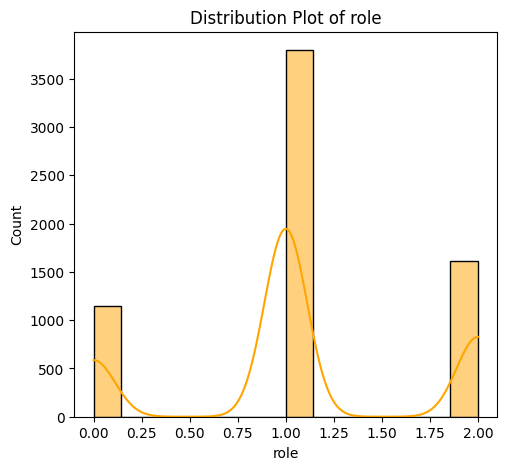

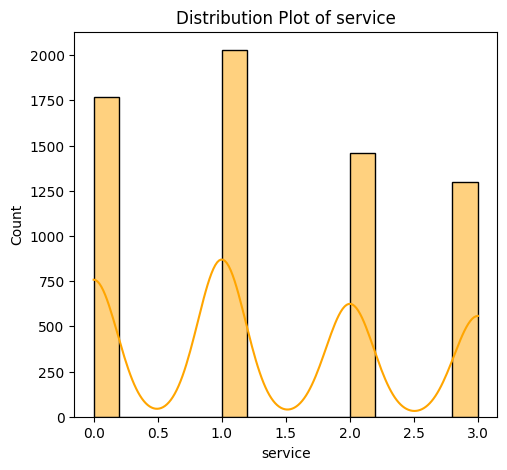

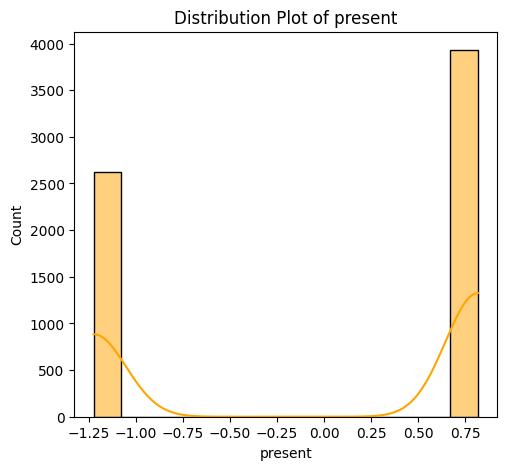

In [ ]:
num_cols = df.select_dtypes(include='number').columns

for col in num_cols:
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,2)
    sns.histplot(df[col], kde=True, color='orange')
    plt.title(f"Distribution Plot of {col}")

    plt.show()

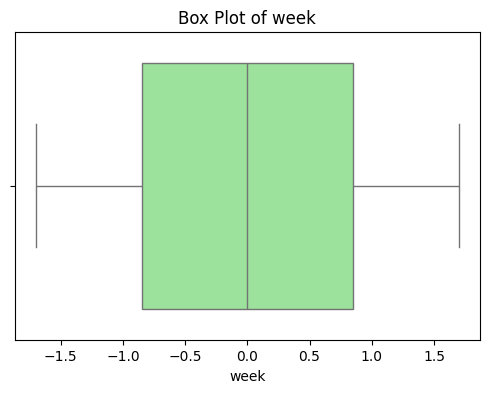

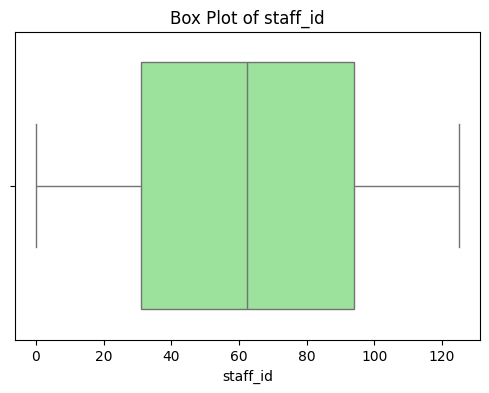

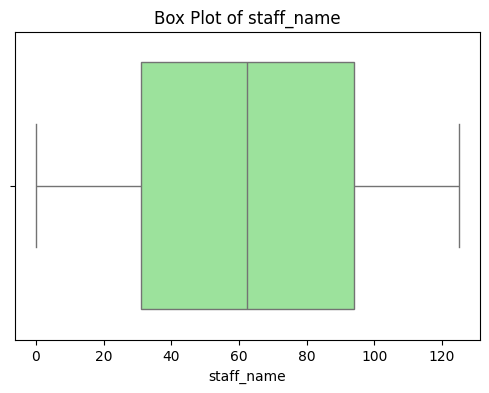

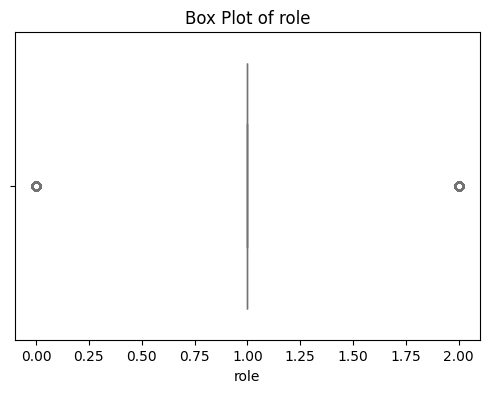

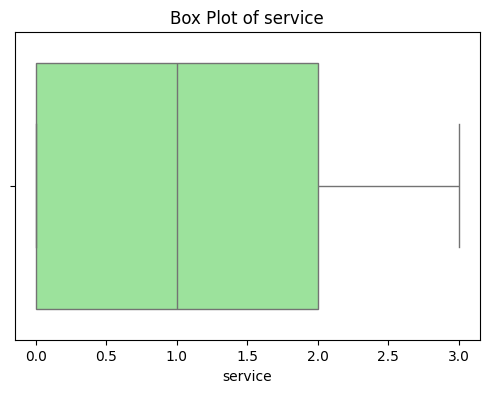

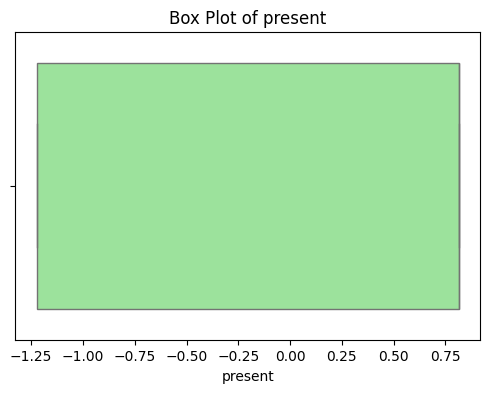

In [ ]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f"Box Plot of {col}")
    plt.show()


In [ ]:
cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(x=df[col], palette='pastel')
    plt.title(f"Bar Chart of {col}")
    plt.xticks(rotation=45)
    plt.show()


In [ ]:
cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(x=df[col], palette='pastel')
    plt.title(f"Bar Chart of {col}")
    plt.xticks(rotation=45)
    plt.show()

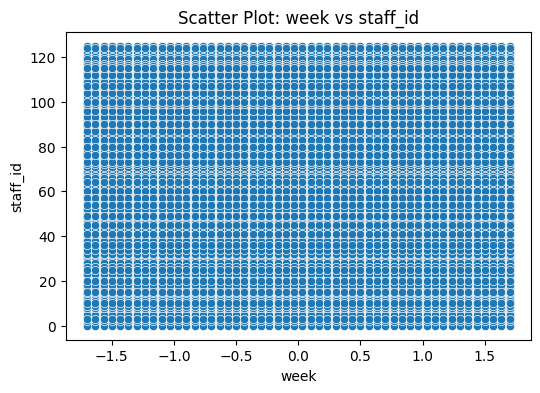

In [ ]:

if len(num_cols) >= 2:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=df[num_cols[0]], y=df[num_cols[1]], hue=cat_cols[0] if len(cat_cols) > 0 else None)
    plt.title(f"Scatter Plot: {num_cols[0]} vs {num_cols[1]}")
    plt.show()


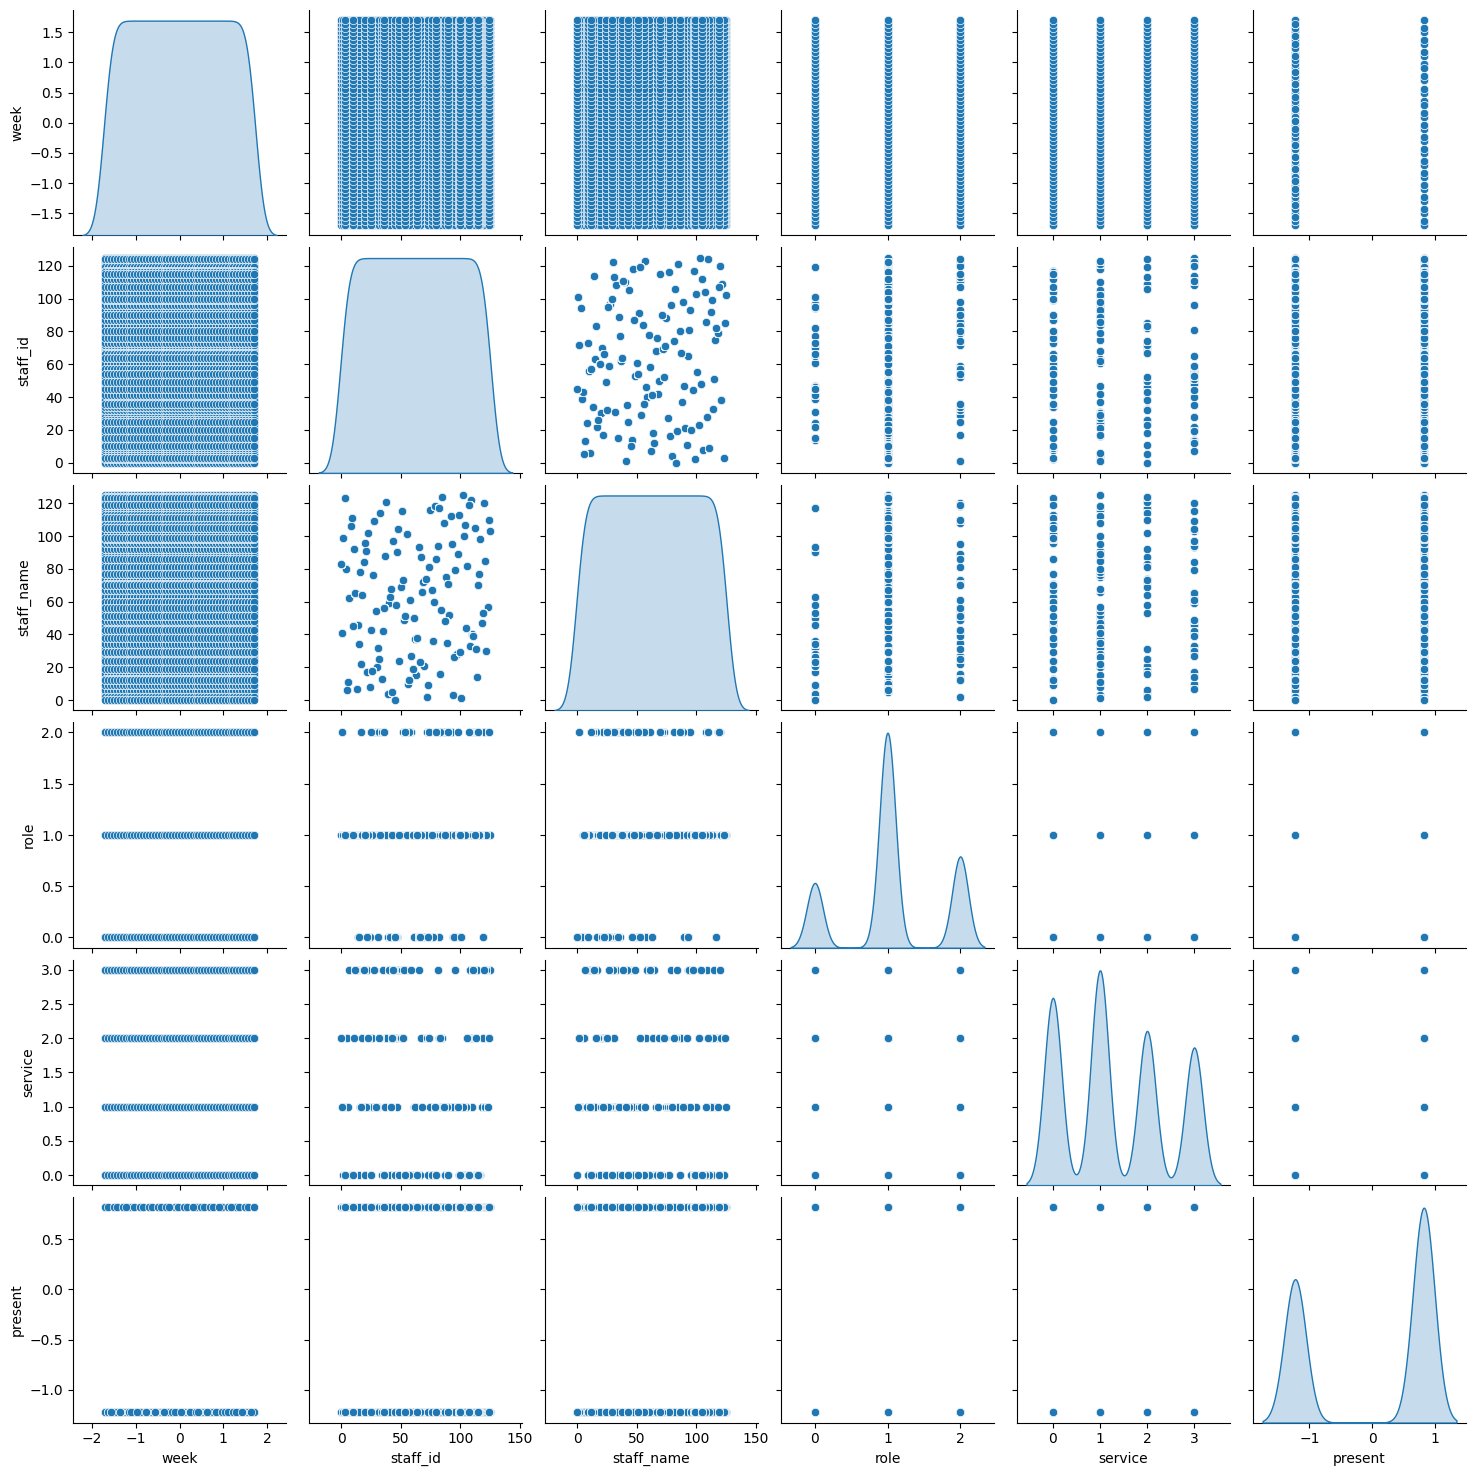

In [ ]:

sns.pairplot(df, vars=num_cols, hue=cat_cols[0] if len(cat_cols) > 0 else None, diag_kind='kde')
plt.show()


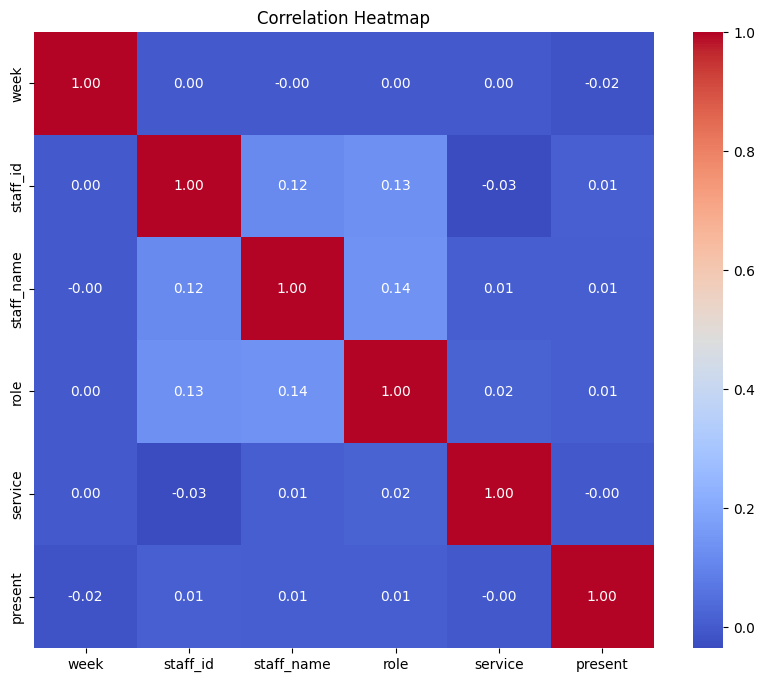

In [ ]:
plt.figure(figsize=(10,8))
corr_matrix = df[num_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


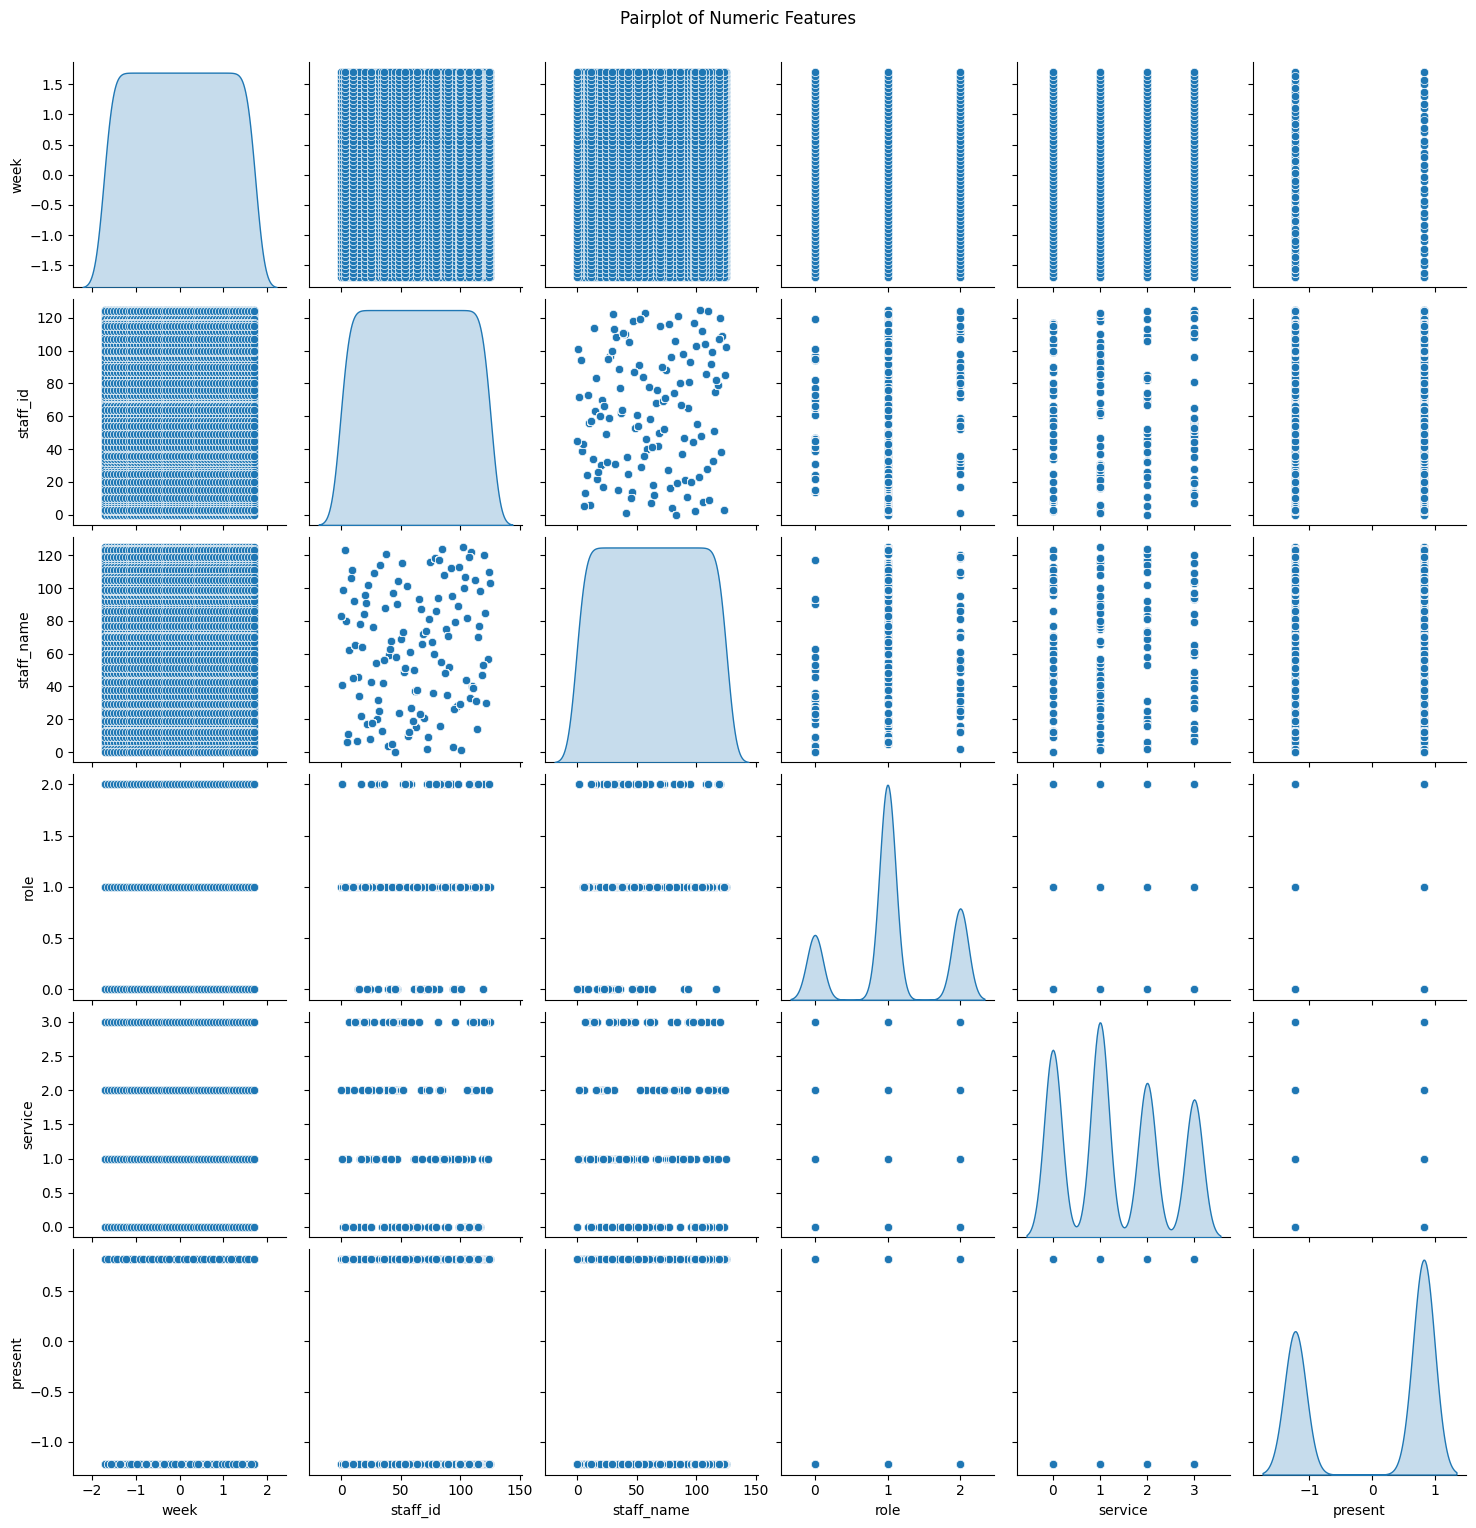

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = df.select_dtypes(include='number').columns
cat_cols = df.select_dtypes(include='object').columns

if len(cat_cols) > 0:
    sns.pairplot(df, vars=num_cols, hue=cat_cols[0], diag_kind='kde', palette='Set2')
else:
    sns.pairplot(df[num_cols], diag_kind='kde')

plt.suptitle("Pairplot of Numeric Features", y=1.02)
plt.show()


In [ ]:
if len(cat_cols) >= 2:

    grouped = df.groupby([cat_cols[0], cat_cols[1]]).size().unstack()


    grouped.plot(kind='bar', stacked=True, figsize=(10,6), colormap='viridis')
    plt.title(f"Stacked Bar Chart: {cat_cols[0]} by {cat_cols[1]}")
    plt.xlabel(cat_cols[0])
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.legend(title=cat_cols[1])
    plt.tight_layout()
    plt.show()



/tmp/ipython-input-2997154420.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


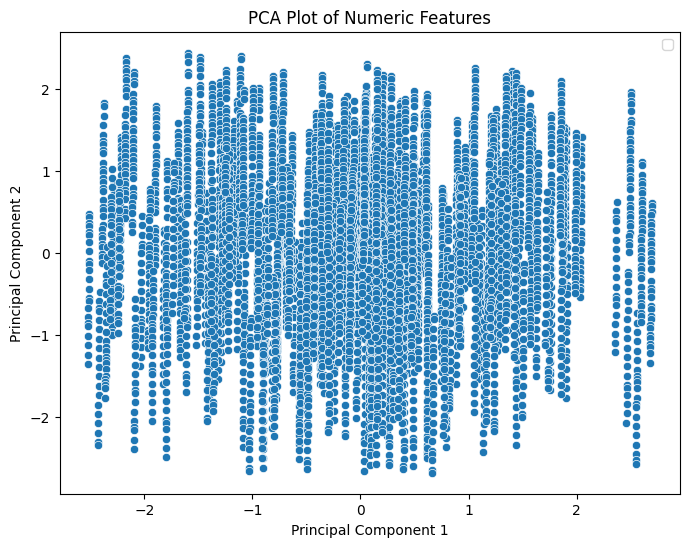

Explained variance ratio of components: [0.21008627 0.16962015]


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
num_data_scaled = scaler.fit_transform(df[num_cols])

pca = PCA(n_components=2)
pca_result = pca.fit_transform(num_data_scaled)


df['PCA1'] = pca_result[:,0]
df['PCA2'] = pca_result[:,1]

plt.figure(figsize=(8,6))
if len(cat_cols) > 0:
    sns.scatterplot(x='PCA1', y='PCA2', data=df, hue=cat_cols[0], palette='Set1')
else:
    sns.scatterplot(x='PCA1', y='PCA2', data=df)

plt.title("PCA Plot of Numeric Features")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()


print("Explained variance ratio of components:", pca.explained_variance_ratio_)


In [ ]:

print(df.describe())

for col in cat_cols:
    print(f"Top categories in {col}:\n", df[col].value_counts().head(), "\n")


if 'Shift' in df.columns:
    print("Most common shift:", df['Shift'].mode()[0])
if 'Role' in df.columns:
    print("Most frequent role:", df['Role'].mode()[0])


               week     staff_id   staff_name         role      service  \
count  6.552000e+03  6552.000000  6552.000000  6552.000000  6552.000000   
mean   1.084467e-18    62.500000    62.500000     1.071429     1.349206   
std    1.000076e+00    36.374697    36.374697     0.644668     1.078864   
min   -1.699056e+00     0.000000     0.000000     0.000000     0.000000   
25%   -8.495282e-01    31.000000    31.000000     1.000000     0.000000   
50%    0.000000e+00    62.500000    62.500000     1.000000     1.000000   
75%    8.495282e-01    94.000000    94.000000     1.000000     2.000000   
max    1.699056e+00   125.000000   125.000000     2.000000     3.000000   

            present          PCA1          PCA2  
count  6.552000e+03  6.552000e+03  6.552000e+03  
mean   6.940588e-17  2.168934e-17  3.470294e-17  
std    1.000076e+00  1.122813e+00  1.008899e+00  
min   -1.224278e+00 -2.521869e+00 -2.680958e+00  
25%   -1.224278e+00 -7.726666e-01 -7.257123e-01  
50%    8.168082e-01  4.5

In [ ]:
# Summary statistics
print(df.describe())

# Count of categorical features
for col in cat_cols:
    print(f"Top categories in {col}:\n", df[col].value_counts().head(), "\n")

# Analyze the 'present' column
print("\nDistribution of 'present' column:\n", df['present'].value_counts())

               week     staff_id   staff_name         role      service  \
count  6.552000e+03  6552.000000  6552.000000  6552.000000  6552.000000   
mean   1.084467e-18    62.500000    62.500000     1.071429     1.349206   
std    1.000076e+00    36.374697    36.374697     0.644668     1.078864   
min   -1.699056e+00     0.000000     0.000000     0.000000     0.000000   
25%   -8.495282e-01    31.000000    31.000000     1.000000     0.000000   
50%    0.000000e+00    62.500000    62.500000     1.000000     1.000000   
75%    8.495282e-01    94.000000    94.000000     1.000000     2.000000   
max    1.699056e+00   125.000000   125.000000     2.000000     3.000000   

            present          PCA1          PCA2  
count  6.552000e+03  6.552000e+03  6.552000e+03  
mean   6.940588e-17  2.168934e-17  3.470294e-17  
std    1.000076e+00  1.122813e+00  1.008899e+00  
min   -1.224278e+00 -2.521869e+00 -2.680958e+00  
25%   -1.224278e+00 -7.726666e-01 -7.257123e-01  
50%    8.168082e-01  4.5

In [ ]:
corr = df[num_cols].corr()
print(corr)


if 'Role' in df.columns and 'Shift' in df.columns:
    shift_role_counts = df.groupby(['Shift','Role']).size().unstack()
    print(shift_role_counts)

                    week      staff_id    staff_name          role  \
week        1.000000e+00  8.050333e-18 -2.474732e-17  5.257311e-19   
staff_id    8.050333e-18  1.000000e+00  1.162625e-01  1.325233e-01   
staff_name -2.474732e-17  1.162625e-01  1.000000e+00  1.399703e-01   
role        5.257311e-19  1.325233e-01  1.399703e-01  1.000000e+00   
service     1.350832e-17 -3.479030e-02  8.495307e-03  2.119525e-02   
present    -1.635615e-02  1.360102e-02  9.190113e-03  6.420511e-03   

                 service   present  
week        1.350832e-17 -0.016356  
staff_id   -3.479030e-02  0.013601  
staff_name  8.495307e-03  0.009190  
role        2.119525e-02  0.006421  
service     1.000000e+00 -0.002998  
present    -2.997721e-03  1.000000  
